In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as  sm
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
country_df= pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\country.csv')

In [3]:
country_df.head(5)

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [4]:
X= sm.add_constant(country_df['Gini_Index'])
Y = country_df['Corruption_Index']

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size= 0.8, random_state= 42)

In [6]:
country_df_lm= sm.OLS(train_Y, train_X).fit()

In [7]:
print(country_df_lm.params)

const         148.375633
Gini_Index     -2.561817
dtype: float64


In [16]:
country_df_lm.summary2()

C:\Users\Ashish\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.487   
Dependent Variable: Corruption_Index AIC:                135.1104
Date:               2024-12-28 12:01 BIC:                136.6556
No. Observations:   16               Log-Likelihood:     -65.555 
Df Model:           1                F-statistic:        15.24   
Df Residuals:       14               Prob (F-statistic): 0.00159 
R-squared:          0.521            Scale:              242.27  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          148.3756  22.2453  6.6700 0.0000 100.6641 196.0872
Gini_Index      -2.5618   0.6563 -3.9037 0.0016  -3.9693  -1.1543
-----------------------------------------------------------------
Omnibus:              1.320        Durbin-Watson:           1.674
Prob(Omnibus):        0.517        Jarque-Bera (JB):        1.000
Skew:                 0.369        Prob(JB):                0.606
Kurtosis:             2.023        Condition No.:           194  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

<Figure size 1000x600 with 0 Axes>

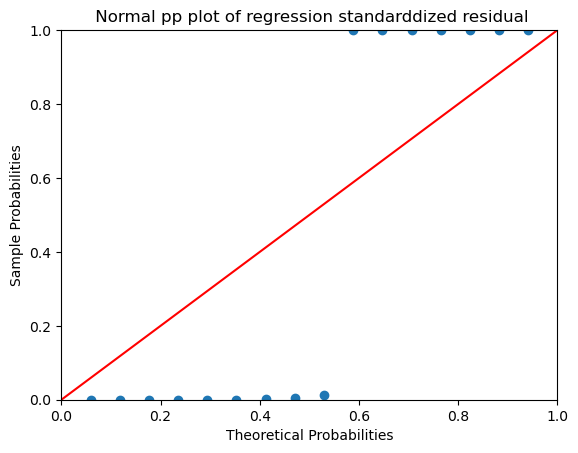

In [35]:
country_df_resid = country_df_lm.resid
probplot = sm.ProbPlot(country_df_resid)
plt.figure(figsize = (10,6))
probplot.ppplot(line = '45')
plt.title(" Normal pp plot of regression standarddized residual")
plt.show()

In [37]:
def get_standardized_value(vals):
    return (vals - vals.mean())/vals.std()

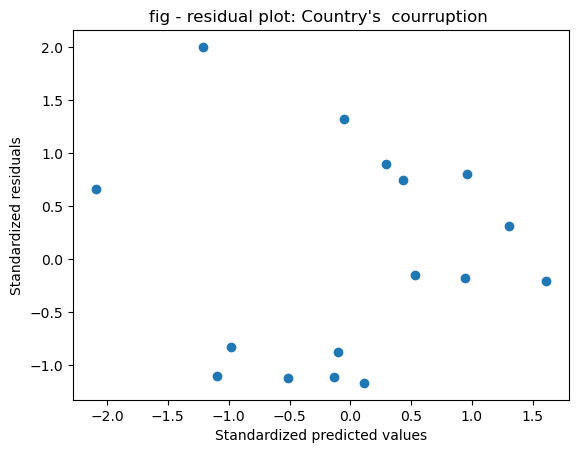

In [39]:
plt.scatter(get_standardized_value(country_df_lm.fittedvalues), get_standardized_value(country_df_resid))
plt.title("fig - residual plot: Country's  courruption ")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized residuals")
plt.show()

In [41]:
from scipy.stats import zscore